> 해당 자료는 전북대학교 이영미 교수님 2023응용통계학 자료임

# 단순선형회귀분석

In [1]:
library(ggplot2)
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [2]:
dt <- data.frame(x = c(4,8,9,8,8,12,6,10,6,9),
                 y = c(9,20,22,15,17,30,18,25,10,20))
dt


x,y
<dbl>,<dbl>
4,9
8,20
9,22
8,15
8,17
12,30
6,18
10,25
6,10


In [4]:
cor(dt$x, dt$y) #상관계수

[1] 0.9218123

- 산점도 그리기

Warning message in plot.window(...):
“"lxab" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"lxab" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"lxab" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"lxab" is not a graphical parameter”
Warning message in box(...):
“"lxab" is not a graphical parameter”
Warning message in title(...):
“"lxab" is not a graphical parameter”


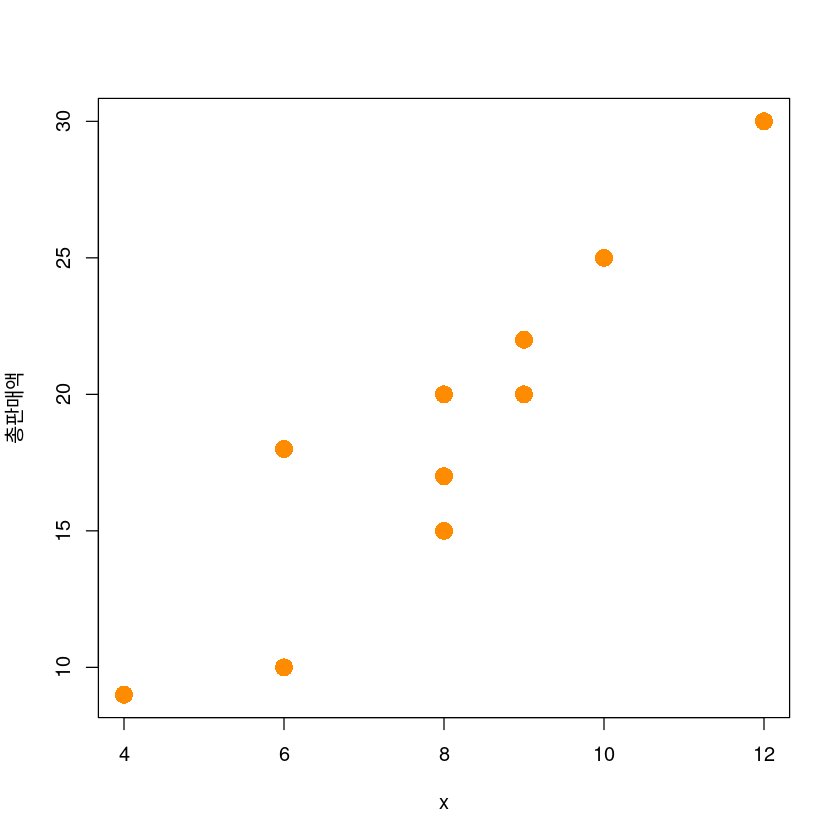

In [7]:
plot(y~x,
     data=dt,
     lxab="광고료",
     ylab="총판매액",
     pch = 16,
     cex = 2,
     col = "darkorange")

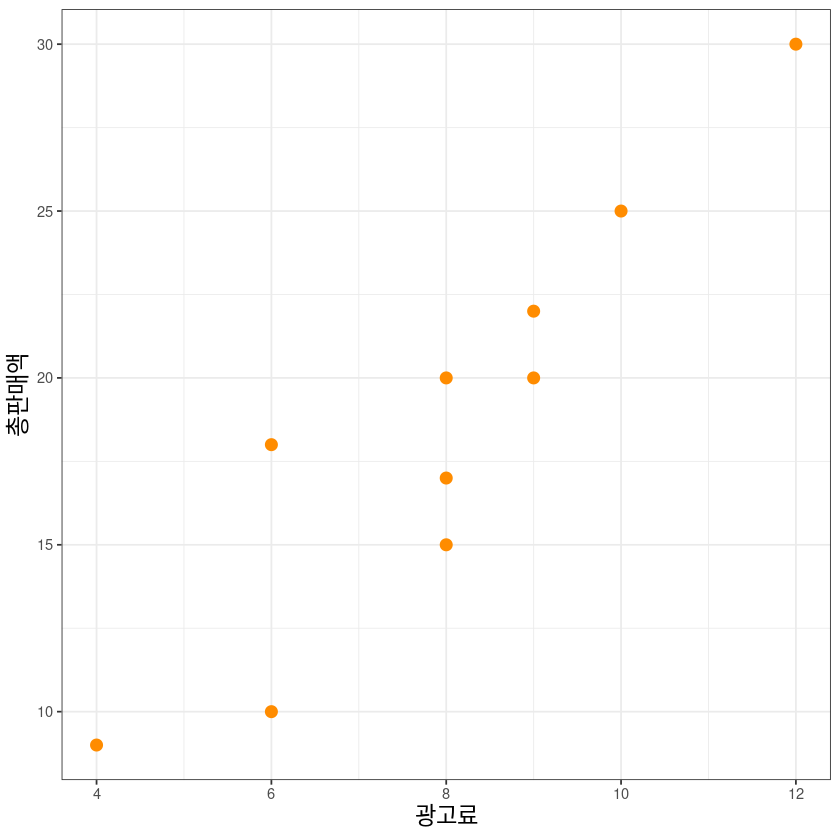

In [8]:
ggplot(dt, aes(x, y)) +
  geom_point(col='darkorange', size=3) +    
  xlab("광고료")+ylab("총판매액")+
  theme_bw() +
  theme(axis.title = element_text(size = 14))

`-` 단순선형회귀모형 
$$y= β_0 + β_1 x + ϵ$$

`-` 추정된 회귀직선

$$\widehat{y}=\widehat{E(y|X=x)}=\widehat{\beta_0}+\widehat{\beta_1}x$$

`-` 모형 적합

- lm(formula, data)

- formula: $y=f(x)$, $y$(반응변수) ~ $x$(설명변수)

In [9]:
model1 <- lm(y~x, dt)

`-` 직접계산

$$\widehat{\beta_0} = \bar y - \widehat{\beta_1} + \bar x $$

$$\widehat{\beta_1} = \dfrac{S_{xy}}{S_{xx}}$$

In [10]:
Sxy <-sum((dt$x - mean(dt$x))*(dt$y - mean(dt$y)))
Sxx <- sum((dt$x - mean(dt$x))^2)
Sxy/Sxx

[1] 2.608696

In [11]:
summary(model1)


Call:
lm(formula = y ~ x, data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-3.600 -1.502  0.813  1.128  4.617 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.2696     3.2123  -0.707 0.499926    
x             2.6087     0.3878   6.726 0.000149 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.631 on 8 degrees of freedom
Multiple R-squared:  0.8497,	Adjusted R-squared:  0.831 
F-statistic: 45.24 on 1 and 8 DF,  p-value: 0.0001487


`-` summary

- 제일 먼저 F검정의 p-value값을 확인하자.

- $H_0$: $\beta_1=0$ vs $H_1$: not $H_0$

![](ch0304_image1.png)

In [12]:
names(model1)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [13]:
model1$coefficients

(Intercept)           x 
  -2.269565    2.608696

`-` 아래 값들은 모두 동일한 값을 리턴한다.

$$\widehat y = \widehat \beta_0 + \widehat \beta_1 x$$

In [14]:
model1$fitted.values

1         2         3         4         5         6         7         8 
 8.165217 18.600000 21.208696 18.600000 18.600000 29.034783 13.382609 23.817391 
        9        10 
13.382609 21.208696

In [15]:
coef(model1)[1] + coef(model1)[2]*dt$x

[1]  8.165217 18.600000 21.208696 18.600000 18.600000 29.034783 13.382609
 [8] 23.817391 13.382609 21.208696

In [16]:
fitted(model1)

1         2         3         4         5         6         7         8 
 8.165217 18.600000 21.208696 18.600000 18.600000 29.034783 13.382609 23.817391 
        9        10 
13.382609 21.208696

In [17]:
fitted.values(model1) 


1         2         3         4         5         6         7         8 
 8.165217 18.600000 21.208696 18.600000 18.600000 29.034783 13.382609 23.817391 
        9        10 
13.382609 21.208696

`-` 아래 값들은 모두 동일한 값을 리턴한다. 

$$e = y- \widehat y$$

In [18]:
model1$residuals

1          2          3          4          5          6          7 
 0.8347826  1.4000000  0.7913043 -3.6000000 -1.6000000  0.9652174  4.6173913 
         8          9         10 
 1.1826087 -3.3826087 -1.2086957

In [19]:
dt$y - model1$fitted.values

1          2          3          4          5          6          7 
 0.8347826  1.4000000  0.7913043 -3.6000000 -1.6000000  0.9652174  4.6173913 
         8          9         10 
 1.1826087 -3.3826087 -1.2086957

In [20]:
resid(model1)

1          2          3          4          5          6          7 
 0.8347826  1.4000000  0.7913043 -3.6000000 -1.6000000  0.9652174  4.6173913 
         8          9         10 
 1.1826087 -3.3826087 -1.2086957

## 회귀모형의 유의성 검정, 분산분석표(ANOVA)

In [21]:
anova(model1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,313.04348,313.043478,45.24034,0.0001486582
Residuals,8,55.35652,6.919565,NA,NA


In [22]:
a <- summary(model1)

In [23]:
ls(a)

[1] "adj.r.squared" "aliased"       "call"          "coefficients" 
 [5] "cov.unscaled"  "df"            "fstatistic"    "r.squared"    
 [9] "residuals"     "sigma"         "terms"

In [24]:
a$r.squared

[1] 0.849738

In [25]:
a$adj.r.squared

[1] 0.8309552

In [26]:
a$fstatistic

value    numdf    dendf 
45.24034  1.00000  8.00000

In [27]:
a$coef ## 회귀계수의 유의성 검정

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-2.269565,3.212348,-0.7065129,0.4999255886
x,2.608696,0.387847,6.7260939,0.0001486582


In [28]:
a$coef[,2] # s.e

(Intercept)           x 
   3.212348    0.387847

## 회귀계수의 신뢰구간

In [29]:
confint(model1, level=0.95)

,2.5 %,97.5 %
(Intercept),-9.677252,5.138122
x,1.714319,3.503073


$$\widehat \beta \pm t_{\alpha/2}(n-2) s.e(\widehat \beta)$$

In [30]:
qt(0.025,8)

[1] -2.306004

In [31]:
qt(0.975,8) #왼쪽에 있는거 t_alpha/2 (n-2)

[1] 2.306004

In [32]:
coef(model1) + qt(0.975, 8) * summary(model1)$coef[,2]

(Intercept)           x 
   5.138122    3.503073

In [33]:
coef(model1) - qt(0.975, 8) * summary(model1)$coef[,2]

(Intercept)           x 
  -9.677252    1.714319

## 절편이 없는 회귀모형

$$y=\beta_1 x + \epsilon$$

In [34]:
model2 <- lm(y ~ 0 + x, dt)
summary(model2)


Call:
lm(formula = y ~ 0 + x, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0641 -1.5882  0.2638  1.4818  3.9359 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x   2.3440     0.0976   24.02  1.8e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.556 on 9 degrees of freedom
Multiple R-squared:  0.9846,	Adjusted R-squared:  0.9829 
F-statistic: 576.8 on 1 and 9 DF,  p-value: 1.798e-09


In [35]:
summary(model1)$r.squared
summary(model2)$r.squared

[1] 0.849738

[1] 0.9846368

- 절편이 없는 회귀모형의 R스퀘어가 더 크므로 model2가 더 좋은 것 같다.

In [36]:
anova(model2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,3769.1895,3769.1895,576.8138,1.79763e-09
Residuals,9,58.8105,6.5345,NA,NA


## LSE

In [37]:
dt1 <- data.frame(
  i = 1:nrow(dt),
  x = dt$x,
  y = dt$y,
  x_barx = dt$x - mean(dt$x),
  y_bary = dt$y - mean(dt$y))


In [38]:
dt1$x_barx2 <- dt1$x_barx^2
dt1$y_bary2 <- dt1$y_bary^2
dt1$xy <-dt1$x_barx * dt1$y_bary

In [39]:
dt1

i,x,y,x_barx,y_bary,x_barx2,y_bary2,xy
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,9,-4,-9.6,16,92.16,38.4
2,8,20,0,1.4,0,1.96,0.0
3,9,22,1,3.4,1,11.56,3.4
4,8,15,0,-3.6,0,12.96,0.0
5,8,17,0,-1.6,0,2.56,0.0
6,12,30,4,11.4,16,129.96,45.6
7,6,18,-2,-0.6,4,0.36,1.2
8,10,25,2,6.4,4,40.96,12.8
9,6,10,-2,-8.6,4,73.96,17.2


In [40]:
round(colSums(dt1),3)

i       x       y  x_barx  y_bary x_barx2 y_bary2      xy 
   55.0    80.0   186.0     0.0     0.0    46.0   368.4   120.0

`-` 직접계산

$$\widehat{\beta_0} = \bar y - \widehat{\beta_1} + \bar x $$

$$\widehat{\beta_1} = \dfrac{S_{xy}}{S_{xx}}$$

In [48]:
beta1 <- as.numeric(colSums(dt1)[8]/colSums(dt1)[6])

beta0 <- mean(dt$y) - beta1 *  mean(dt$x)

In [49]:
cat("hat beta0 = ", beta0)

hat beta0 =  -2.269565

In [50]:
cat("hat beta1 = ", beta1)

hat beta1 =  2.608696

## 그림

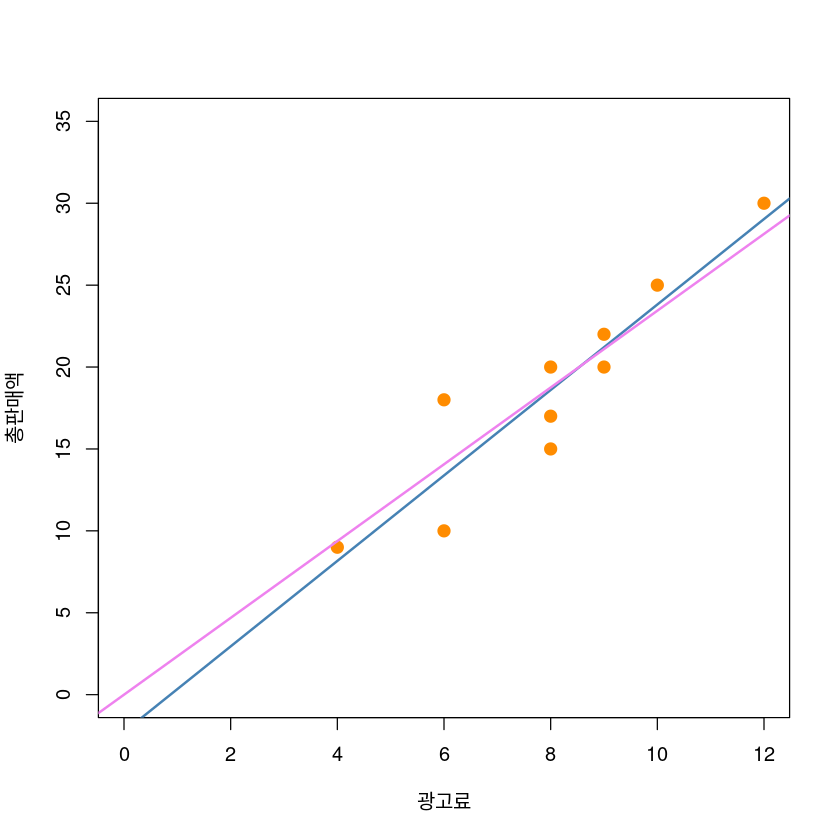

In [51]:
plot(y~x, data = dt,
     xlab = "광고료",
     ylab = "총판매액",
     pch  = 20,
     cex  = 2,
     col  = "darkorange",
     ylim = c(0,35),
     xlim = c(0, 12))
abline(model1, col='steelblue', lwd=2)
abline(model2, col='violet', lwd=2)


In [52]:
co <- coef(model1)
co_2 <- coef(model2) 

Warning message in geom_point(col = "steelblue", lwd = 3):
“Ignoring unknown parameters: `linewidth`”


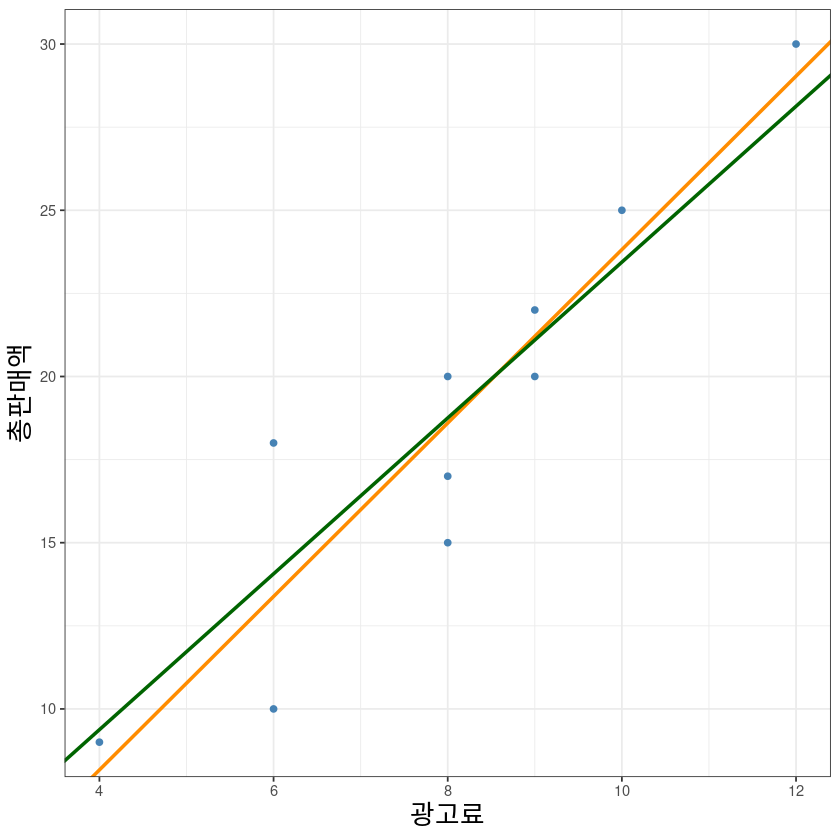

In [55]:
ggplot(dt, aes(x, y)) +
   geom_point(col='steelblue', lwd=3) +
   geom_abline(intercept = co[1], slope = co[2], col='darkorange', lwd=1) +
   geom_abline(intercept = 0, slope = co_2, col='darkgreen', lwd=1) +
   xlab("광고료")+ylab("총판매액")+
   theme_bw()+
   theme(axis.title = element_text(size = 16))

## 신뢰대

In [56]:
bb <- summary(model1)$sigma *
  sqrt( 1 + 1/10 + (dt$x - 8)^2/46) ## 개별 y에 대한 추정량의 표준오차
dt$ma95y <- model1$fitted + 2.306*bb
dt$mi95y <- model1$fitted - 2.306*bb


In [57]:
qt(0.975,8)

[1] 2.306004

`geom_smooth()` using formula = 'y ~ x'


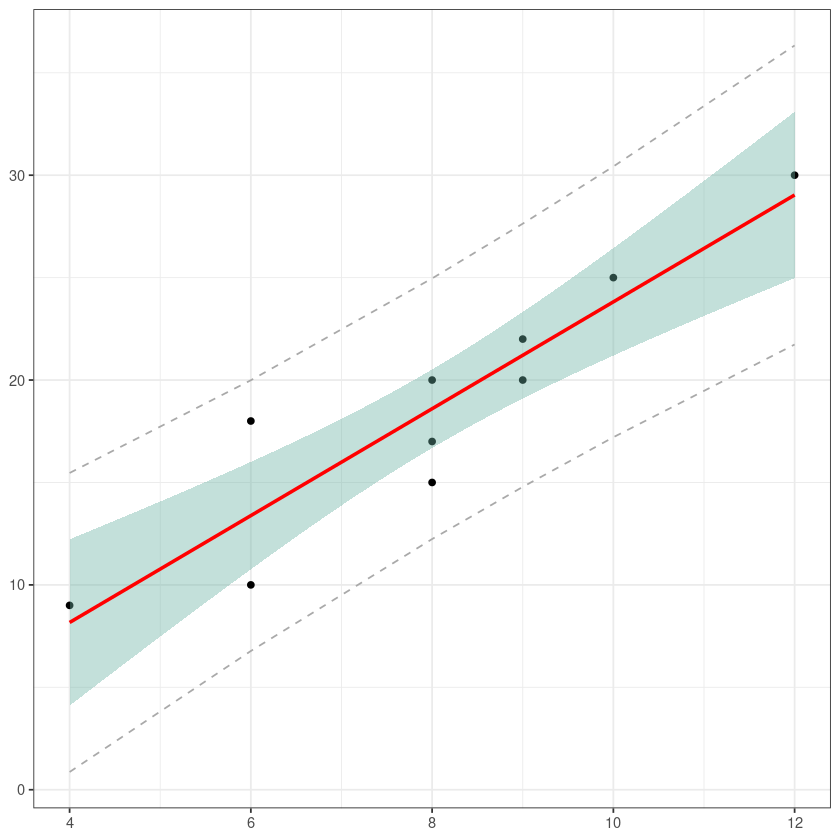

In [58]:
ggplot(dt, aes(x=x, y=y)) +
  geom_point() +
  geom_smooth(method=lm,
              color="red", fill="#69b3a2", se=TRUE)+
  geom_line(aes(x,mi95y), col='darkgrey', lty=2)+
  geom_line(aes(x,ma95y), col='darkgrey', lty=2) +
  theme_bw() +
  theme(axis.title = element_blank())

## 평균반응, 개별y 추정

$$E(Y|x_0)$$

$$y=E(Y|x_0)+\epsilon$$

- $x_0$=4.5

In [59]:
new_dt <- data.frame(x = 4.5)

$$\widehat \mu_0 = \widehat y_0 = \widehat \beta_0 + \widehat \beta_1 4.5$$

In [61]:
model1$coefficients[1] + model1$coefficients[2]*4.5


(Intercept) 
   9.469565

In [62]:
predict(model1, newdata = new_dt)


1 
9.469565

In [63]:
predict(model1, 
        newdata = new_dt,
        interval = c("confidence"),  #구간추정
        level = 0.95)  ##평균반응


,fit,lwr,upr
1,9.469565,5.79826,13.14087


In [64]:
predict(model1, newdata = new_dt, 
        interval = c("prediction"),  
        level = 0.95)  ## 개별 y

,fit,lwr,upr
1,9.469565,2.379125,16.56001


In [65]:
dt_pred <- data.frame(
  x = c(1:12, 20, 35, 50),
  predict(model1, 
          newdata=data.frame(x=c(1:12, 20, 35, 50)), 
          interval="confidence", level = 0.95),
  predict(model1, 
          newdata=data.frame(x=c(1:12, 20, 35, 50)), 
          interval="prediction", level = 0.95)[,-1])
dt_pred

,x,fit,lwr,upr,lwr.1,upr.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.3391304,-6.2087835,6.887044,-8.5867330,9.264994
2,2,2.9478261,-2.7509762,8.646628,-5.3751666,11.270819
3,3,5.5565217,0.6905854,10.422458,-2.2199297,13.332973
4,4,8.1652174,4.1058891,12.224546,0.8663128,15.464122
5,5,10.7739130,7.4756140,14.072212,3.8692308,17.678595
6,6,13.3826087,10.7597808,16.005437,6.7738957,19.991322
7,7,15.9913043,13.8748223,18.107786,9.5667143,22.415894
8,8,18.6000000,16.6817753,20.518225,12.2379683,24.962032
9,9,21.2086957,19.0922136,23.325178,14.7841056,27.633286


In [66]:
names(dt_pred)[5:6] <- c('plwr', 'pupr')
dt_pred

,x,fit,lwr,upr,plwr,pupr
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.3391304,-6.2087835,6.887044,-8.5867330,9.264994
2,2,2.9478261,-2.7509762,8.646628,-5.3751666,11.270819
3,3,5.5565217,0.6905854,10.422458,-2.2199297,13.332973
4,4,8.1652174,4.1058891,12.224546,0.8663128,15.464122
5,5,10.7739130,7.4756140,14.072212,3.8692308,17.678595
6,6,13.3826087,10.7597808,16.005437,6.7738957,19.991322
7,7,15.9913043,13.8748223,18.107786,9.5667143,22.415894
8,8,18.6000000,16.6817753,20.518225,12.2379683,24.962032
9,9,21.2086957,19.0922136,23.325178,14.7841056,27.633286


In [67]:
barx <- mean(dt$x)
bary <- mean(dt$y)

## 신뢰대2

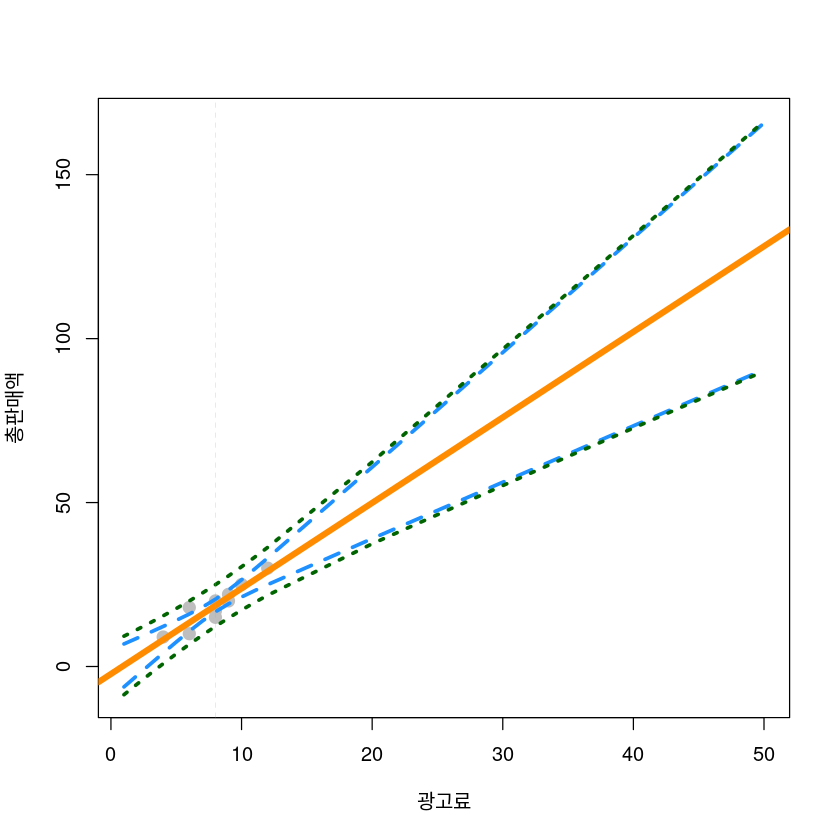

In [70]:
plot(y~x, data = dt,
     xlab = "광고료",
     ylab = "총판매액",
     ylim = c(min(dt_pred$plwr), max(dt_pred$pupr)),
     xlim = c(1,50),
     pch  = 20,
     cex  = 2,
     col  = "grey"
     )
abline(model1, lwd = 5, col = "darkorange")
lines(dt_pred$x, dt_pred$lwr, col = "dodgerblue", lwd = 3, lty = 2)
lines(dt_pred$x, dt_pred$upr, col = "dodgerblue", lwd = 3, lty = 2)
lines(dt_pred$x, dt_pred$plwr, col = "darkgreen", lwd = 3, lty = 3)
lines(dt_pred$x, dt_pred$pupr, col = "darkgreen", lwd = 3, lty = 3)

abline(v=barx, lty=2, lwd=0.2, col='dark grey')

## 잔차분석

`-` $\epsilon$ : 선형성, 등분산성, 정규성, 독립성

In [71]:
dt$yhat <- model1$fitted
dt$resid <- model1$residuals

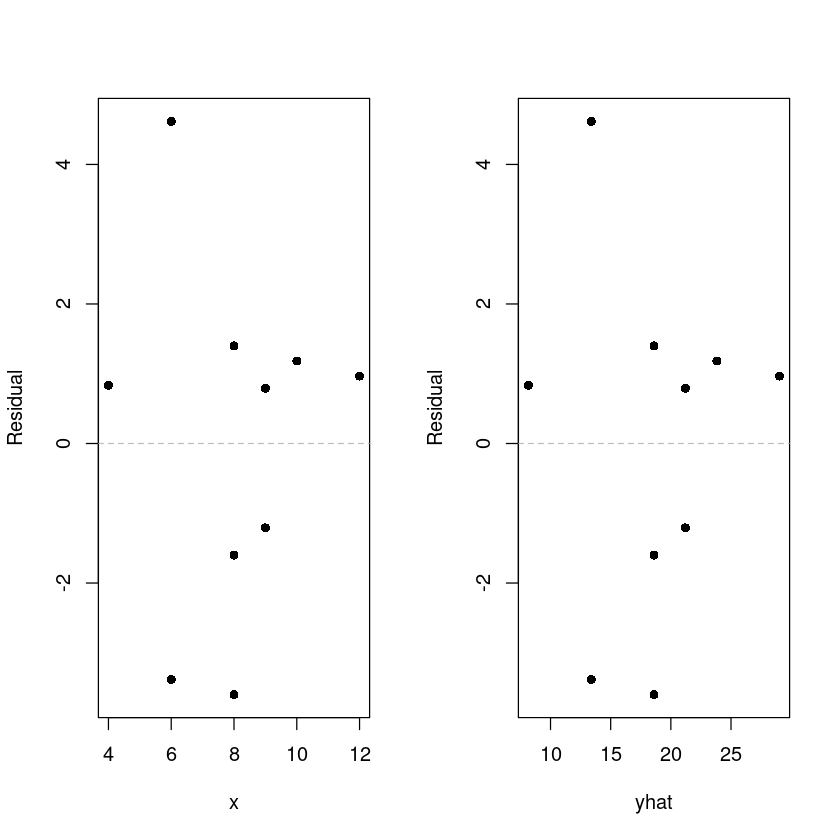

In [72]:
par(mfrow=c(1,2))
plot(resid ~ x, dt, pch=16, ylab = 'Residual')
abline(h=0, lty=2, col='grey')
plot(resid ~ yhat, dt, pch=16, ylab = 'Residual')
abline(h=0, lty=2, col='grey')
par(mfrow=c(1,1))

### 등분산성

- $H_0$:등분산 vs $H_1$:이분산 (Heteroscedesticity)

In [73]:
bptest(model1)


	studentized Breusch-Pagan test

data:  model1
BP = 1.6727, df = 1, p-value = 0.1959


### 잔차의 QQ plot

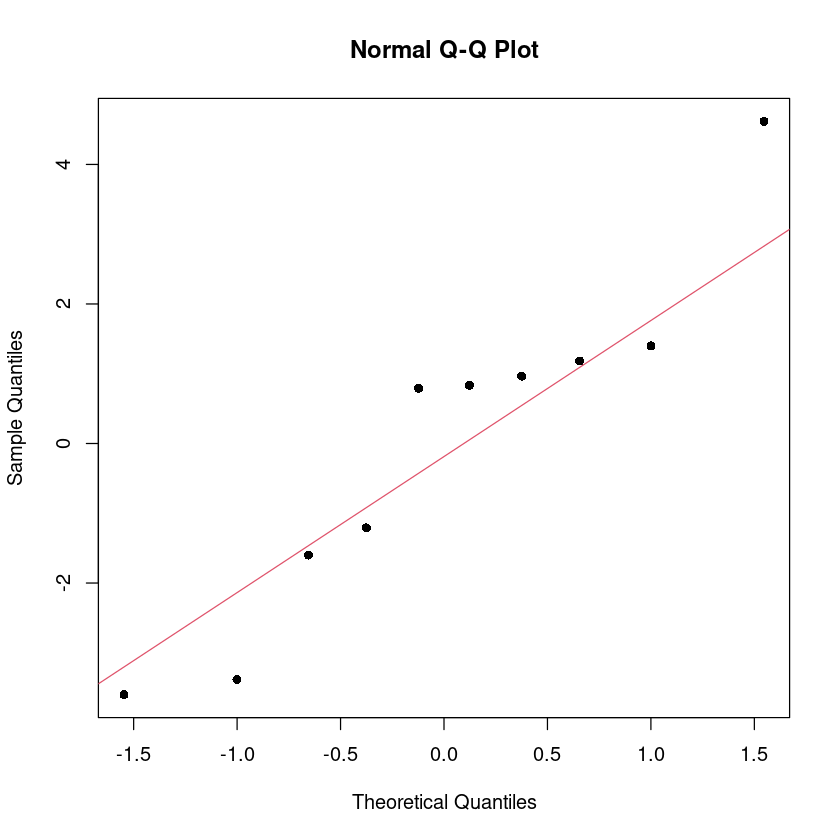

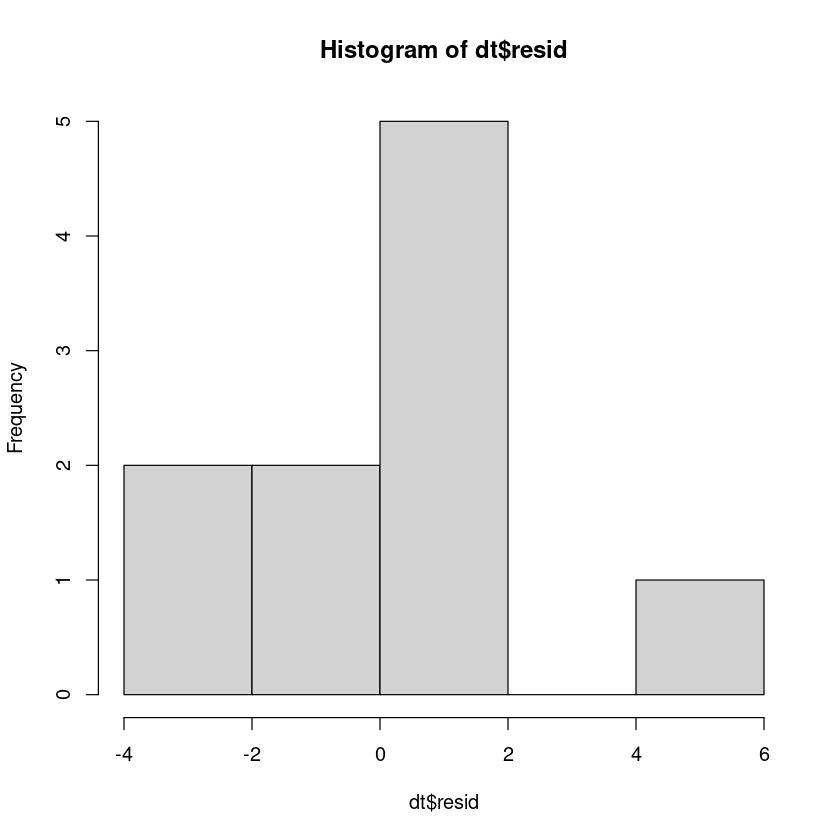

In [74]:
qqnorm(dt$resid, pch=16)
qqline(dt$resid, col = 2)

hist(dt$resid)

### Shapiro-Wilk Test

- $H_0$:normal distribution vs $H_1$: not $H_0$

In [75]:
shapiro.test(resid(model1))



	Shapiro-Wilk normality test

data:  resid(model1)
W = 0.92426, p-value = 0.3939


### 독립성검정: DW test

In [76]:
dwtest(model1, alternative = "two.sided")  #H0 : uncorrelated vs H1 : rho != 0


	Durbin-Watson test

data:  model1
DW = 1.4679, p-value = 0.3916
alternative hypothesis: true autocorrelation is not 0


In [77]:
dwtest(model1, alternative = "greater")  #H0 : uncorrelated vs H1 : rho > 0


	Durbin-Watson test

data:  model1
DW = 1.4679, p-value = 0.1958
alternative hypothesis: true autocorrelation is greater than 0


In [78]:
dwtest(model1, alternative = "less")     #H0 : uncorrelated vs H1 : rho < 0


	Durbin-Watson test

data:  model1
DW = 1.4679, p-value = 0.8042
alternative hypothesis: true autocorrelation is less than 0
